In [1]:
#!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("spam.csv", encoding='iso8859_14')
data.tail()

,target,email
1480,spam,",""This is the 2nd time we have tried 2 contact..."
1481,spam,",""REMINDER FROM O2: To get 2.50 pounds free ca..."
1482,spam,",Free entry in 2 a wkly comp to win FA Cup fin..."
1483,spam,",""Had your contract mobile 11 Mnths? Latest Mo..."
1484,spam,",ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE..."


In [4]:
data.shape

(1485, 2)

In [5]:
data.drop(labels=data.columns[2:],axis=1,inplace=True)
data.columns=['target','text']
data.tail(6)

,target,text
1479,ham,Haha mayb u're rite... U know me well. Da feel...
1480,spam,",""This is the 2nd time we have tried 2 contact..."
1481,spam,",""REMINDER FROM O2: To get 2.50 pounds free ca..."
1482,spam,",Free entry in 2 a wkly comp to win FA Cup fin..."
1483,spam,",""Had your contract mobile 11 Mnths? Latest Mo..."
1484,spam,",ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE..."


In [6]:
stopwords_en = stopwords.words('english');
englishStemmer = SnowballStemmer("english")
# si no hacemos esto y usamos directo stopwords_sp, CountVectorizer devuelve un warning
stopwords_en_stem = [englishStemmer.stem(x) for x in stopwords_en]
vectorizer = CountVectorizer(stop_words = stopwords_en_stem, lowercase = True, strip_accents = 'unicode');
vectorizer.fit(data.text);
#print('Vocabulario:\n',vectorizer.vocabulary_) # vocabulario del corpus con la frecuencia de cada término

In [7]:
countvectorizer_encoding = vectorizer.transform(data.text);
pd.DataFrame(countvectorizer_encoding.todense(), 
             columns = vectorizer.get_feature_names()) # Usamos el método .todense() para ver la matriz completa

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,008704050406,0089,01223585236,01223585334,0125698789,02,0207,02072069400,...,yourinclusive,yours,yr,yrs,yummy,yup,zebra,zed,zoe,zouk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
tfidf_encoding = TfidfTransformer().fit_transform(countvectorizer_encoding);
pd.DataFrame(tfidf_encoding.todense(),columns = vectorizer.get_feature_names())

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,008704050406,0089,01223585236,01223585334,0125698789,02,0207,02072069400,...,yourinclusive,yours,yr,yrs,yummy,yup,zebra,zed,zoe,zouk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
svd = TruncatedSVD(n_components=2);
data_components = svd.fit_transform(tfidf_encoding)
data_components_df = pd.DataFrame(data_components)

In [10]:
data_components_df.tail()

,0,1
1480,0.287765,-0.181945
1481,0.194673,0.117010
1482,0.132346,0.107480
1483,0.178836,0.216855
1484,0.126910,0.028697


In [11]:
data_components_df.shape

(1485, 2)

In [16]:
data.tail()

,target,text
1480,true,",""This is the 2nd time we have tried 2 contact..."
1481,true,",""REMINDER FROM O2: To get 2.50 pounds free ca..."
1482,true,",Free entry in 2 a wkly comp to win FA Cup fin..."
1483,true,",""Had your contract mobile 11 Mnths? Latest Mo..."
1484,true,",ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE..."


In [13]:
data['target'] = np.where(data['target']=='spam',"true","false")
dataframes = [data_components_df,data]
data2 = pd.concat(dataframes, axis=1)
data2.drop(labels=data2.columns[3:],axis=1,inplace=True)
data2.columns=['Var1','Var2','target']
data2['Var1'] = data2['Var1']*1000
data2['Var2'] = data2['Var2']*1000
data2['Var1'] = data2['Var1'].round(0)
data2['Var2'] = data2['Var2'].round(0)

<AxesSubplot:xlabel='Var1', ylabel='Var2'>

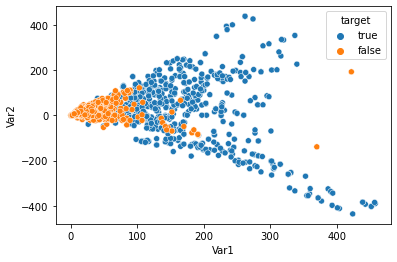

In [14]:
sns.scatterplot(x = data2.iloc[:, 0], y = data2.iloc[:, 1], hue = data.target)

In [15]:
data2.to_csv('data2vector.csv')